# Linear Regression (Students Tests Data) 
### original data from UCI: https://archive.ics.uci.edu/ml/datasets/Student+Performance with some features removed

In [ ]:
# This code is for learning purposes
# Draft, April 16, 2017 by Abed Khooli for the Applied Data Science training (https://github.com/abedkhooli/ds2)
# Licensed under Creative Commons non-commercial (CC BY-NC 4.0)

In [12]:
# students tests linear regression 

# reference the caret package (wrapper of many machine learning R algorithms)
library(caret) # caret also loads 2 packages: lattice and ggplot2

# Read CSV, note the delimiter (sep) in a data frame
df <- read.csv('students.csv')

In [13]:
# explore the data
head(df,3)

X,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
1,R,F,18,U,GT3,A,4,4,at_home,...,yes,no,4,3,4,3,6,5,6,6
2,R,F,19,U,GT3,T,1,1,at_home,...,yes,yes,5,3,3,3,4,5,5,6
3,R,F,19,U,LE3,T,1,1,at_home,...,yes,yes,4,3,2,3,10,7,8,10


In [14]:
# get rid of the first column (serial number)
df <- df[ , 2:ncol(df)]   # or df <- df[ , -1]

# check the new df
head(df, 3)

# see if df has missing values
any(is.na(df)) # false

# identify numerical columns
num_col <- sapply(df, is.numeric)

# derive data frame of numerical columns
df_num <- df[num_col]

# display first 3 rows
head(df_num,3)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
R,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,4,3,4,3,6,5,6,6
R,F,19,U,GT3,T,1,1,at_home,other,...,yes,yes,5,3,3,3,4,5,5,6
R,F,19,U,LE3,T,1,1,at_home,other,...,yes,yes,4,3,2,3,10,7,8,10


[1] FALSE

age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
18,4,4,2,2,0,4,3,4,3,6,5,6,6
19,1,1,1,2,0,5,3,3,3,4,5,5,6
19,1,1,1,2,3,4,3,2,3,10,7,8,10


### Note: all numerical features above from Medu to absenses are ordered, so no additional processing is required for these. Categorical features should be inspected and may require pre-processing (ex. convert to factor).

In [15]:
# check if features are correlated (works only on numerical features)
df_cor <- cor(df_num)
df_cor

# seems feature # 13 (G2) is strongly correlated (at least 90%)
findCorrelation(df_cor, cutoff = 0.9) 

# can also find if features are linear combination of others
#findLinearCombos(df_num)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
age,1.000000000,0.007290627,-0.027293193,-0.108984299,-0.094090884,0.14571275,0.011506383,0.10679849,-0.049060257,0.008010967,-0.003118663,0.01200620,0.06253879,0.08118949
Medu,0.007290627,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,-0.046877829,0.100284818,0.20534100,0.21552717,0.21714750
Fedu,-0.027293193,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.014741537,0.024472887,0.19026994,0.16489339,0.15245694
traveltime,-0.108984299,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.007500606,-0.012943775,-0.09303999,-0.15319796,-0.11714205
studytime,-0.094090884,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.075615863,-0.062700175,0.16061192,0.13588000,0.09781969
failures,0.145712751,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.065827282,0.063725833,-0.35471761,-0.35589563,-0.36041494
famrel,0.011506383,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,0.094055728,-0.044354095,0.02216832,-0.01828135,0.05136343
freetime,0.106798492,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.075733357,-0.058077922,0.01261293,-0.01377714,0.01130724
goout,-0.049060257,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,-0.009577254,0.044302220,-0.14910397,-0.16225003,-0.13279147
health,0.008010967,-0.046877829,0.014741537,0.007500606,-0.075615863,0.06582728,0.094055728,0.07573336,-0.009577254,1.000000000,-0.029936711,-0.07317207,-0.09771987,-0.06133460


[1] 13

In [16]:
# students with zero G3. These probably have no school records for G3 and absences. Let's remove them
G3Z <- df[which(df$G3 ==0),]
head(G3Z, 5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
129,R,M,18,R,GT3,T,2,2,services,other,...,yes,yes,3,3,3,4,0,7,4,0
131,R,F,19,R,GT3,T,3,4,services,teacher,...,yes,yes,4,2,2,5,0,12,0,0
132,R,F,19,U,GT3,T,1,1,at_home,other,...,yes,yes,4,3,3,4,0,8,0,0
135,R,M,19,R,GT3,T,3,4,at_home,teacher,...,yes,no,5,3,3,5,0,9,0,0
136,R,F,19,U,GT3,T,4,4,services,at_home,...,yes,yes,4,3,3,5,0,11,0,0


In [17]:
df <- df[which(df$G3 !=0),]
dim(df)

[1] 357  29

In [18]:
# check if variance is very small (near zero variance)
nearZeroVar(df, saveMetrics = TRUE) # everything is OK

,freqRatio,percentUnique,zeroVar,nzv
school,7.500000,0.5602241,FALSE,FALSE
sex,1.075581,0.5602241,FALSE,FALSE
age,4.028571,1.4005602,FALSE,FALSE
address,3.576923,0.5602241,FALSE,FALSE
famsize,2.336449,0.5602241,FALSE,FALSE
Pstatus,8.153846,0.5602241,FALSE,FALSE
Medu,1.388889,1.4005602,FALSE,FALSE
Fedu,1.085106,1.4005602,FALSE,FALSE
Mjob,1.351064,1.4005602,FALSE,FALSE
Fjob,1.960000,1.4005602,FALSE,FALSE


In [19]:
# set seed to re-generate same random values to split dataset
set.seed(100)

# caret simplifies split for training and testing
df_sampling_vector <- createDataPartition(df$G3, p =0.75, list = FALSE)
df_train <- df[df_sampling_vector, ]
df_test <- df[-df_sampling_vector, ]

# verify
head(df_train, 3)
head(df_test, 3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
3,R,F,19,U,LE3,T,1,1,at_home,other,...,yes,yes,4,3,2,3,10,7,8,10
5,R,F,19,U,GT3,T,3,3,other,other,...,yes,no,4,3,2,5,4,6,10,10
6,R,M,19,U,LE3,T,4,3,services,other,...,yes,yes,5,4,2,5,10,15,15,15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
1,R,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,4,3,4,3,6,5,6,6
2,R,F,19,U,GT3,T,1,1,at_home,other,...,yes,yes,5,3,3,3,4,5,5,6
4,R,F,19,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,5,2,15,14,15


In [20]:
# keep labels (outputs) for train and test data
df_train_label <- df$G3[df_sampling_vector]
head(df_train_label,3)

df_test_label <- df$G3[-df_sampling_vector]
head(df_test_label,3)

[1] 10 10 15

[1]  6  6 15

In [21]:
# train a linear model. This means consider g3 as function of all other features
student_lm <- lm(G3 ~ ., data = df_train)

# evaluate training model
summary(student_lm)


Call:
lm(formula = G3 ~ ., data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.17520 -0.43861 -0.05084  0.57472  1.89537 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.798584   2.405255   1.995  0.04721 *  
schoolR1         -0.149731   0.191249  -0.783  0.43448    
sexM             -0.003729   0.119853  -0.031  0.97521    
age              -0.210783   0.121285  -1.738  0.08355 .  
addressU          0.124912   0.143456   0.871  0.38480    
famsizeLE3       -0.046029   0.118215  -0.389  0.69736    
PstatusT         -0.251091   0.187300  -1.341  0.18137    
Medu             -0.038205   0.079016  -0.484  0.62919    
Fedu             -0.033085   0.067524  -0.490  0.62461    
Mjobhealth        0.158300   0.268476   0.590  0.55602    
Mjobother        -0.324216   0.193704  -1.674  0.09552 .  
Mjobservices     -0.082780   0.208430  -0.397  0.69162    
Mjobteacher       0.120564   0.253415   0.476  0.63469    
Fjobhealth

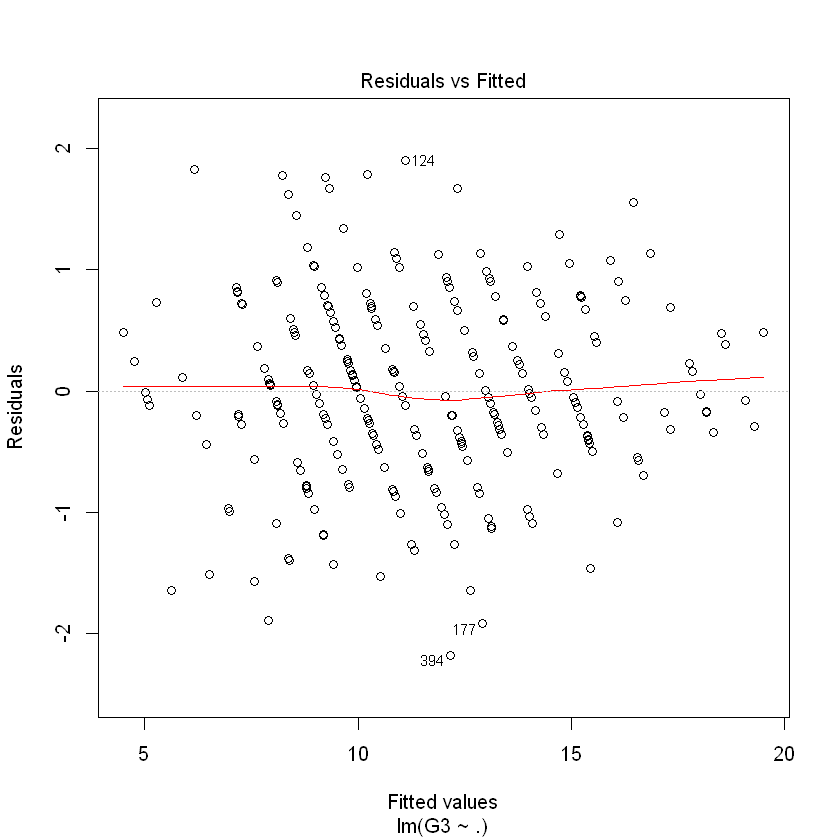

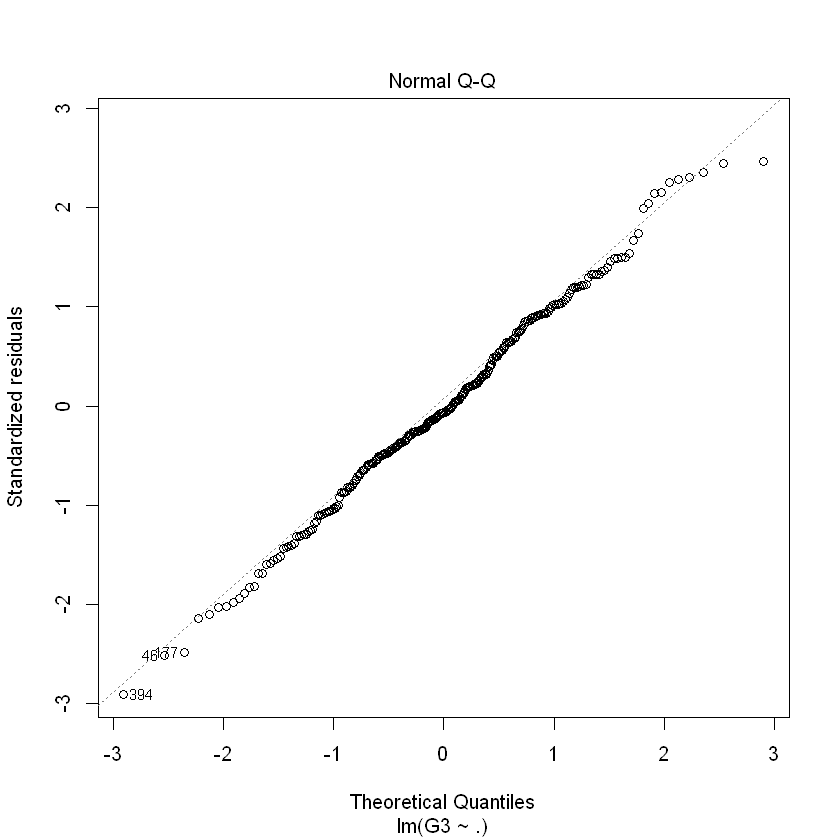

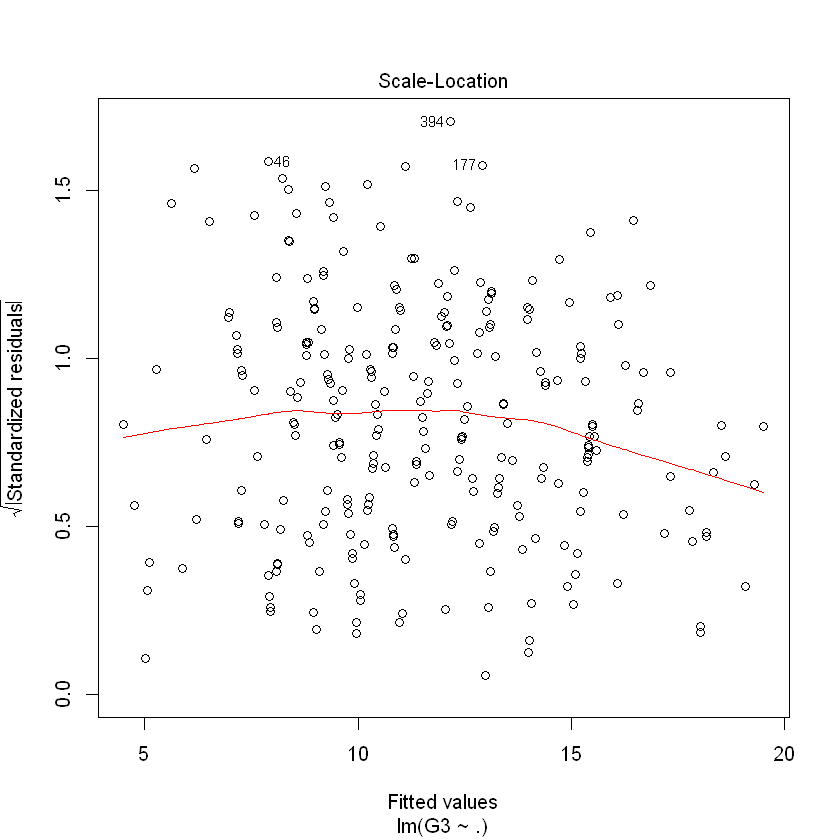

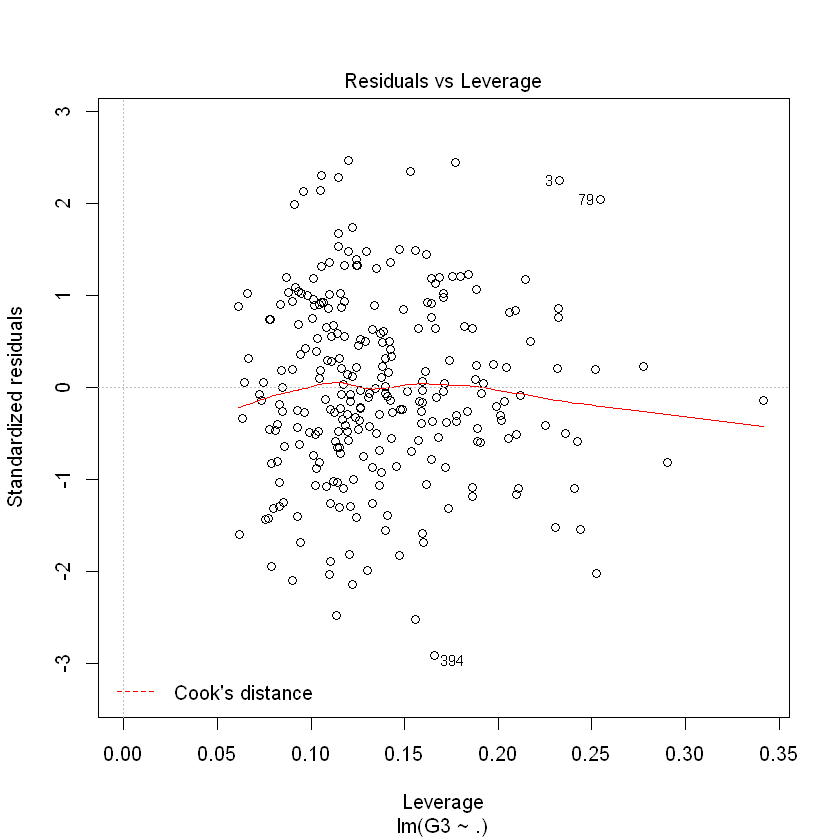

In [22]:
# check for useless features if you get singularities above (in summary)
# alias(celt_lm) # here, no section for Complete (only Model)
# if singular, we could use 
# celt_lm2 <- lm(G3 ~. -G2, data = df_train)
# summary(celt_lm2$residuals)
# summary(celt_lm2)
plot(student_lm)

In [23]:
# now predict the test data outputs
student_pred <- predict(student_lm, df_test)

In [24]:
# define a function to calcculare mean squared errors
compute_mse <- function(predictions, actual) {
mean( (predictions - actual) ^ 2 )
}

In [29]:
# pass the predictions and actual values to test model
mse <- compute_mse(student_pred, df_test$G3) 
# root mean squared error
rmse <- sqrt(mse)
print(paste("MSE: ", mse))
print(paste("RMSE: ", rmse))

[1] "MSE:  0.715551248275164"
[1] "RMSE:  0.845902623400096"


In [28]:
# caret has a function to calculate RMSE and R^2
postResample(pred = student_pred, obs = df_test$G3)

RMSE  Rsquared 
0.8459026 0.9299492

In [35]:
#--- SSR, SSE and SST: see https://www.youtube.com/watch?v=aq8VU5KLmkY 
# on how to calculate R2

SSR <- sum((student_pred - mean(df_test$G3))^2)
SSE <- sum((df_test$G3 - student_pred)^2)
SST <- SSR + SSE

Rsq <- SSR/SST
Rsq # this looks correct comapred to caret's value

# using approximation (not encouraged)
SSE = sum((student_pred - df_test$G3)^2)
# here, SST is calculated directly
SST = sum( (mean(df_test$G3) - df_test$G3)^2)

R2 = 1 - SSE/SST
R2
# slight difference 

[1] 0.9338020444

[1] 0.9269266017

### Practice: test different features (hold some) and compare performance. Also try other train/test ratios and try to predict total grade (out of 60)